# Solutions

## 1. Sampling uniformly on a disk

Consider the following probability distribution:
\begin{align*}
p(x, y) = \frac{1}{\pi} \mathbb{1}_{x^2 + y^2 \leq 1}(x, y),
\end{align*}
where $\mathbb{1}_{x^2 + y^2 \leq 1}$ is the indicator function of the disk of radius 1 centered at the origin.

- Using a **transformation method**, develop a sampler for this distribution.

**Hint**: Consider sampling a radius and an angle - and convert them to Cartesian coordinates. The most obvious choice may not work!

- After the transformation method, implement the usual rejection sampling method to sample from the disk.

- Sample from $x$-marginal of this distribution. Plot the histogram of the samples.

**Solution:** The naive approach is the sampler:

$r \sim \text{Uniform}(0, 1)$ and $\theta \sim \text{Uniform}(-\pi, \pi)$, then $x = r \cos(\theta)$ and $y = r \sin(\theta)$. This sampler is **not** uniform on the disk.

We can compute the density of $X_1, X_2$ as
\begin{align*}
    p_{x_1, x_2}(x_1, x_2) = p_{r,\theta}(g^{-1}(x_1, x_2)) \left|\det J_{g^{-1}}\right|,
\end{align*}
where $g^{-1}$ is the inverse transformation. Let us construct the inverse transform:
\begin{align*}
r = \sqrt{x_1^2 + x_2^2}
\end{align*}
by just observing that $\cos^2 \theta + \sin^2 \theta = 1$. We can also write that
\begin{align*}
    \theta = \arctan(x_2 / x_1).
\end{align*}
Therefore, we can write the inverse transformation as
\begin{align*}
    g^{-1}(x_1, x_2) = \left(\sqrt{x_1^2 + x_2^2}, \arctan(x_2 / x_1)\right).
\end{align*}
We next need to compute the Jacobian matrix as:
\begin{align*}
    J_{g^{-1}} = \begin{bmatrix}
    \frac{\partial g_1^{-1}}{\partial x_1} & \frac{\partial g_1^{-1}}{\partial x_2} \\
    \frac{\partial g_2^{-1}}{\partial x_1} & \frac{\partial g_2^{-1}}{\partial x_2}
    \end{bmatrix} = \begin{bmatrix}
    \frac{x_1}{\sqrt{x_1^2 + x_2^2}} & \frac{x_2}{\sqrt{x_1^2 + x_2^2}} \\
    \frac{1}{1 + (x_2/x_1)^2} \frac{-x_2}{x_1^2} & \frac{1}{1+(x_2/x_1)^2} \frac{1}{x_1}
    \end{bmatrix}.
\end{align*}
Therefore, the determinant is
\begin{align*}
    \det J_{g^{-1}} = \frac{1}{\sqrt{x_1^2 + x_2^2}}.
\end{align*}
Therefore, the density of $X_1, X_2$ is
\begin{align*}
    p_{x_1, x_2}(x_1, x_2) &= \text{Unif}(\sqrt{x_1^2 + x_2^2}; 0, 1) \text{Unif}(\arctan(x_2/x_1); -\pi, \pi) \frac{1}{\sqrt{x_1^2 + x_2^2}} \\
    &=\frac{1}{2\pi \sqrt{x_1^2 + x_2^2}} \quad \quad \text{for } x_1^2 + x_2^2 \leq 1.
\end{align*}
**Not uniform!**

Correct answer is $X_1 = \sqrt{r} \cos(\theta)$ and $X_2 = \sqrt{r} \sin(\theta)$.

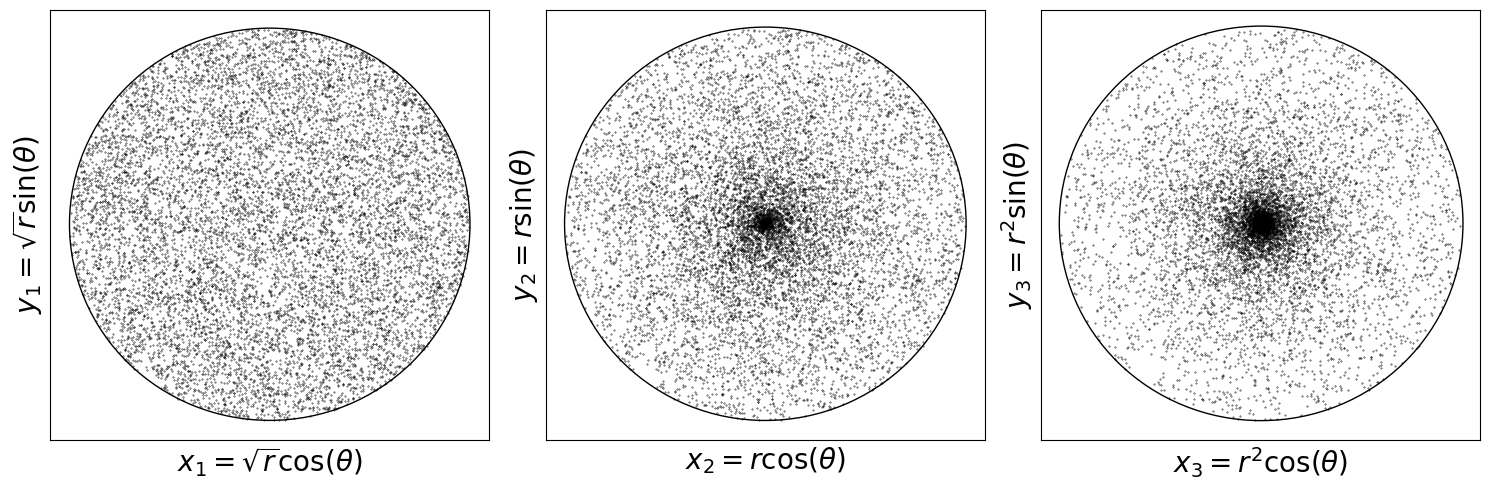

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# sample an angle uniformly (0, 2pi)
def sample_angle(n):
    return np.random.uniform(0, 2 * np.pi, n)

# sample a radius uniformly (0, 1)
def sample_radius(r_t, n):
    return np.random.uniform(0, r_t, n)

n = 10000

r_t = 1
# sample n angles and n radii uniformly and plot them in cartesian coordinates
theta = sample_angle(n)
r = sample_radius(1, n)
x1 = np.sqrt(r) * np.cos(theta)
y1 = np.sqrt(r) * np.sin(theta)

x2 = r * np.cos(theta)
y2 = r * np.sin(theta)

x3 = r**2 * np.cos(theta)
y3 = r**2 * np.sin(theta)

# draw a unit circle and plot x, y samples within it
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].add_artist(plt.Circle((0, 0), np.sqrt(r_t), color='k', fill=False))
ax[0].scatter(x1, y1, s=0.1, c='k')
ax[0].set_xlabel(r"$x_1 = \sqrt{r} \cos(\theta)$", fontsize=20)
ax[0].set_ylabel(r"$y_1 = \sqrt{r} \sin(\theta)$", fontsize=20)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].add_artist(plt.Circle((0, 0), r_t, color='k', fill=False))
ax[1].scatter(x2, y2, s=0.1, c='k')
ax[1].set_xlabel(r"$x_2 = r \cos(\theta)$", fontsize=20)
ax[1].set_ylabel(r"$y_2 = r \sin(\theta)$", fontsize=20)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].add_artist(plt.Circle((0, 0), r_t, color='k', fill=False))
ax[2].scatter(x3, y3, s=0.1, c='k')
ax[2].set_xlabel(r"$x_3 = r^2 \cos(\theta)$", fontsize=20)
ax[2].set_ylabel(r"$y_3 = r^2 \sin(\theta)$", fontsize=20)
ax[2].set_xticks([])
ax[2].set_yticks([])

fig.tight_layout()

plt.show()


## 2. Monte Carlo Integration

Consider the following integral:
\begin{align*}
I = \int_0^1 (1 - x^2)^{1/2} \mathrm{d} x.
\end{align*}
Take the sampling distribution as uniform on $[0,1]$. Build the Monte Carlo estimate for varying $N$ and compute the mean and the variance, i.e., for $\varphi(x) = (1 - x^2)^{1/2}$ and given $X_1, \ldots, X_N$ from $\text{Unif}(0,1)$, compute

\begin{align}
\hat{\varphi}^N = \frac{1}{N} \sum_{i=1}^N \varphi(X_i)
\end{align}
and the empirical variance
\begin{align}
\widehat{\textsf{var}}[\hat{\varphi}^N] = \frac{1}{N^2} \sum_{i=1}^N (\varphi(X_i) - \hat{\varphi}^N)^2.
\end{align}
Discuss the difference between this empirical estimator vs. the correct one for the variance (using the true value). Plot your mean estimates \eqref{eq:mean_estimates}, standard deviation estimates (by taking the square root of \eqref{eq:variance_est}), and the true value $I = \pi/4$. Can you always trust the variance estimates? Here is a code snippet for this one:

(0.0, 10000.0)

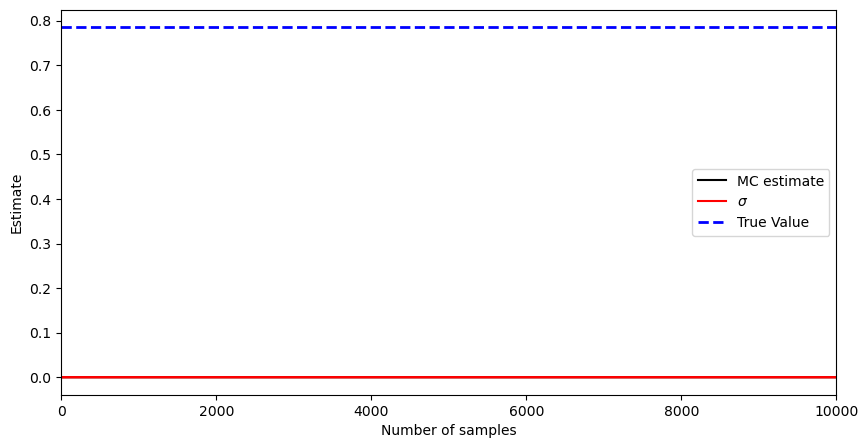

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def phi(x):
    return np.sqrt((1 - x**2))

I = np.pi / 4 # true value

N_max = 10000 # go up to 10,000 samples

U = np.random.uniform(0, 1, N_max)
I_est = np.zeros(N_max - 1) # this is longer than we need
I_var = np.zeros(N_max - 1)

fig = plt.figure(figsize=(10, 5))

k = 0

K = np.array([])

# We are not computing for every N for efficiency

for N in range(1, N_max, 5):

    I_est[k] = 0 # Your mean estimate here
    I_var[k] = 0 # Your variance estimate here

    k = k + 1 # We index estimators with k as we jump N by 5
    K = np.append(K, N)

plt.plot(K, I_est[0:k], 'k-', label='MC estimate')
plt.plot(K, I_est[0:k] + np.sqrt(I_var[0:k]), 'r', label=r'$\sigma$', alpha=1)
plt.plot(K, I_est[0:k] - np.sqrt(I_var[0:k]), 'r', alpha=1)
plt.plot([0, N_max], [I, I], 'b--', label='True Value', alpha=1, linewidth=2)
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Estimate')
plt.xlim([0, N_max])

**Solution:** 

/var/folders/d8/86whr2t12h70n511w7s7cm_w0000gn/T/ipykernel_86684/2275840071.py:38: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, N_max])


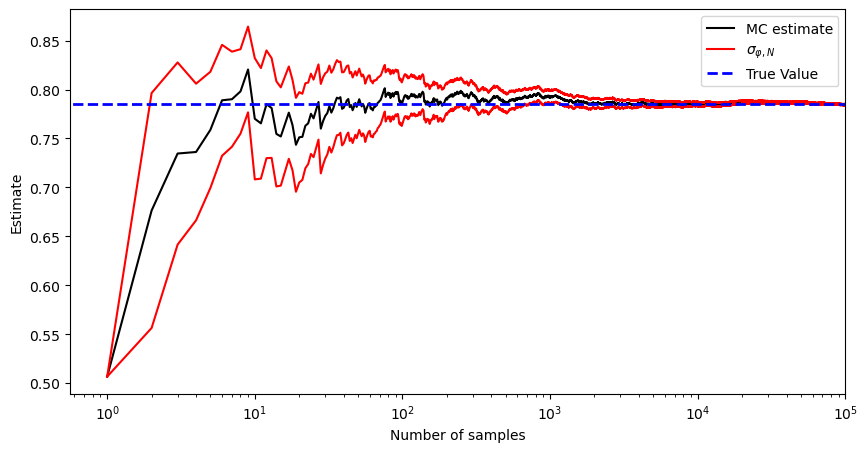

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def phi(x):
    return np.sqrt((1 - x**2))

I = np.pi / 4

N_max = 100000

U = np.random.uniform(0, 1, N_max)
I_est = np.zeros(N_max - 1)
I_var = np.zeros(N_max - 1)
I_var_correct = np.zeros(N_max - 1)

fig = plt.figure(figsize=(10, 5))

K = np.array([])
k = 0

for N in range(1, N_max, 1):
    # print(N)

    I_est[k] = (1/N) * np.sum(phi(U[0:N]))
    I_var[k] = (1/(N**2)) * np.sum((phi(U[0:N]) - I_est[k])**2)

    k = k + 1

    K = np.append(K, N)

plt.semilogx(K, I_est[0:k], 'k-', label='MC estimate')
plt.plot(K, I_est[0:k] + np.sqrt(I_var[0:k]), 'r', label='${\\sigma}_{\\varphi,N}$', alpha=1)
plt.plot(K, I_est[0:k] - np.sqrt(I_var[0:k]), 'r', alpha=1)
plt.plot([0, N_max], [I, I], 'b--', label='True Value', alpha=1, linewidth=2)
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Estimate')
plt.xlim([0, N_max])
plt.show()

## 3. Importance Sampling



Implement the importance sampling method for estimating
\begin{align*}
\mathbb{P}(X > 4),
\end{align*}
where $X\sim \mathcal{N}(0,1)$. Try two methods: (i) Standard Monte Carlo integration by drawing i.i.d samples from $\mathbb{P}$ and (ii) importance sampling. What kind of proposals should you choose? What is a good criterion for this example? Choose different proposals and test their efficiency in terms of getting a low relative error vs. samples.

**Solution:** Monte Carlo sampler is just sampling $\mathcal{N}(0,1)$ and keeping samples $X>4$ as we covered several times -- the IS estimator is also provided in lecture notes. Below is one solution. Here the proposal is
$$q(x) = \mathcal{N}(x; 6, 1).$$

In [9]:

import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(4, 20, 100000)

def p(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

def q(x, mu, sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)

def w(x, mu, sigma):
    return p(x)/q(x, mu, sigma)

I = np.trapezoid(p(xx), xx) # Numerical computation of the integral

print('Integral of p(x) from 4 to infinity: ', I)

N = 10000

x = np.random.normal(0, 1, N) # iid samples from p(x)

I_est_MC = (1/N) * np.sum(x > 4)
print('Monte Carlo estimate: ', I_est_MC)

mu = 6
sigma = 1

x_s = np.zeros(N)
weights = np.zeros(N)

for i in range(N):
    x_s[i] = np.random.normal(mu, sigma, 1)[0]
    weights[i] = w(x_s[i], mu, sigma)

I_est_IS = (1/N) * np.sum(weights * (x_s > 4))
print('Importance sampling estimate: ', I_est_IS)

Integral of p(x) from 4 to infinity:  3.16712429751607e-05
Monte Carlo estimate:  0.0
Importance sampling estimate:  2.8032612129635055e-05
